In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from collections import Counter

/home/satyam/anaconda3/lib/python3.7/site-packages/Bio/__init__.py:128: BiopythonWarning: You may be importing Biopython from inside the source tree. This is bad practice and might lead to downstream issues. In particular, you might encounter ImportErrors due to missing compiled C extensions. We recommend that you try running your code from outside the source tree. If you are outside the source tree then you have a setup.py file in an unexpected directory: /home/satyam/anaconda3/lib/python3.7/site-packages.
  format(_parent_dir), BiopythonWarning)


In [3]:
COVID_sequence = SeqIO.read("/home/satyam/covid_wuhan_seq.fa","fasta")
COVID_sequence

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet()), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

In [4]:
Bat_sequence = SeqIO.read("/home/satyam/bat_RaTG13_sequence.fasta","fasta")
Bat_sequence

SeqRecord(seq=Seq('CTTTCCAGGTAACAAACCAACGAACTCTCGATCTCTTGTAGATCTGTTCTCTAA...AAA', SingleLetterAlphabet()), id='MN996532.1', name='MN996532.1', description='MN996532.1 Bat coronavirus RaTG13, complete genome', dbxrefs=[])

In [5]:
#extracting the sequence
COVID_nucleotide_sequence = COVID_sequence.seq
COVID_nucleotide_sequence

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())

In [6]:
Bat_nucleotide_sequence = Bat_sequence.seq
Bat_nucleotide_sequence

Seq('CTTTCCAGGTAACAAACCAACGAACTCTCGATCTCTTGTAGATCTGTTCTCTAA...AAA', SingleLetterAlphabet())

In [7]:
print("The length of the COVID sequence is::", len(COVID_nucleotide_sequence))

The length of the COVID sequence is:: 29903


In [9]:
print("The length of the Bat sequence is::", len(Bat_nucleotide_sequence))

The length of the Bat sequence is:: 29855


In [10]:
#creating a custom function to calculate the GC content of the sequence
def GC_content(sequence):
    result = float(sequence.count('G') + sequence.count('C'))/len(sequence)*100
    return result

print("The GC content of COVID sequence is----->", GC_content(COVID_nucleotide_sequence))
print("The GC content of Bat sequence is------>", GC_content(Bat_nucleotide_sequence))

The GC content of COVID sequence is-----> 37.97277865097147
The GC content of Bat sequence is------> 38.037179701892484


In [11]:
#translating the nucleotide sequence into protein sequence
covid_protein_sequence = COVID_nucleotide_sequence.translate()
print("The translated sequence is::\n",covid_protein_sequence)

The translated sequence is::
 IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKN

/home/satyam/anaconda3/lib/python3.7/site-packages/Bio/Seq.py:2715: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


In [12]:
#translating the nucleotide sequence into protein sequence
bat_protein_sequence = Bat_nucleotide_sequence.translate()
print("The translated sequence is::\n",bat_protein_sequence)

The translated sequence is::
 LSR*QTNELSISCRSVL*TNFKICVTVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACLTGSRRARTWLWRLRGGGFIRGTSTS*RWHLWLSRS*KRCFAST*TALCVHQTF*CSNCTSWPCYG*AGSRT*WHSVWS*W*DTRCPCPLCGRNTSGLPQGSSS*ER**RSWWP*LRR*SKVV*LRRRAWH*SL*RFSRKLEH*T*QWCHP*SHA*A*WRSIHSLCR*QLLWP*WLPS*VH*RPSSSCW*SFMHFVRTTGLY*H*KRCILLS*T*A*DCLVHGTF*KEL*IADTF*N*IGKEI*HI*WGMSKFCIPPKFHNQDYSTKG*KEKA*WLYG*NSICLSSCFTK*MQPNVPFNSHEV*SLW*NFMADRRFC*SHL*ILWH*KFD*RGCHYLWLPTPKCCCQNLLSSMS*SRSRT*A*SC*IS**IWLETHSS*GWSHYCFWRLCVLLCWLLQ*VCLLDSTC*RQHRLQSYRCCWRRF*RS***PS*NTSKRESQHQYCW*L*T**RDRHYFGIFFCFYKCFCGNCERFGL*NIQTNC*ILR*L*SYKGEGKERCLEHW*TKINIESSLCICVRGCSCCSINFLPHS*NCSKFRACLTEGRYNNTRWNFTVLTETH*CYDVHI*FGY*QSGCNGLHYRWCCSVDFTVANKYLWHCL*ATQTCS*LARREIQGRCRVS*RWLGNC*IYLNLCL*NCRWTNCHLCKGN*RECSDIL*ACKQIFGFMC*LHHHWWS*T*SLEFR*NICHTLKGIV*KVC*TQRRNWLTHASESSKRNYFLRGRNTSYRSVNRGSCLENW*FTTIRTTY**SC*SPIGWYTSLH*RAHVARN*RHRKVLCPCT*YDGNKQYLHT*RRCTNKSYFW**HCD*SARL*ECEYHF*T*RKD**GT*REVLYLYS*TRYRSK*VCLCCSRCCHKNFTTSI

In [13]:
print("The total length of the COVID protein sequence is ------>", len(covid_protein_sequence))
print("The total length of the Bat protein sequence is ------->", len(bat_protein_sequence))

The total length of the COVID protein sequence is ------> 9967
The total length of the Bat protein sequence is -------> 9951


In [14]:
covid_amino_acid_frequency = Counter(covid_protein_sequence)
print("The frequency of COVID amino acid is::\n", covid_amino_acid_frequency)
print("================================================================================================================")
bat_amino_acid_frequency = Counter(bat_protein_sequence)
print("The frequency of Bat amino acid is::\n", bat_amino_acid_frequency)

The frequency of COVID amino acid is::
 Counter({'L': 886, 'S': 810, '*': 774, 'T': 679, 'C': 635, 'F': 593, 'R': 558, 'V': 548, 'Y': 505, 'N': 472, 'I': 436, 'K': 413, 'G': 394, 'A': 375, 'H': 332, 'Q': 325, 'P': 292, 'D': 290, 'E': 270, 'W': 263, 'M': 117})
The frequency of Bat amino acid is::
 Counter({'L': 903, 'S': 829, '*': 747, 'T': 673, 'C': 602, 'F': 575, 'R': 546, 'V': 540, 'Y': 531, 'N': 464, 'K': 428, 'I': 420, 'G': 418, 'A': 385, 'Q': 327, 'D': 318, 'H': 317, 'P': 293, 'E': 260, 'W': 253, 'M': 122})


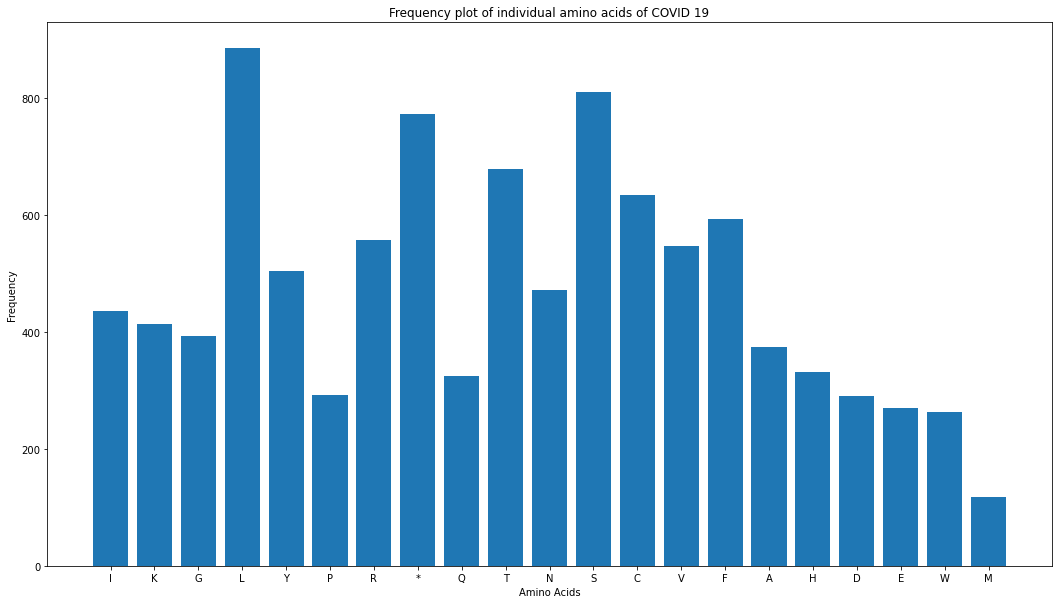

In [15]:
#plotting the count of amino acids
plt.figure(figsize=(18,10))
plt.bar(covid_amino_acid_frequency.keys(), covid_amino_acid_frequency.values())
plt.xlabel("Amino Acids")
plt.ylabel("Frequency")
plt.title("Frequency plot of individual amino acids of COVID 19")
plt.show()

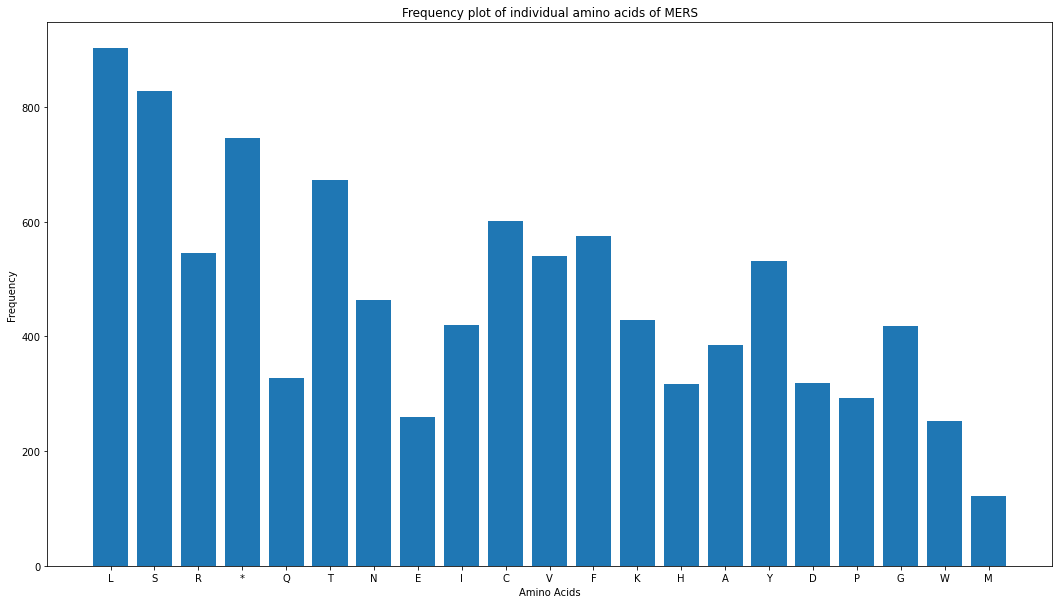

In [16]:
#plotting the count of amino acids
plt.figure(figsize=(18,10))
plt.bar(bat_amino_acid_frequency.keys(), bat_amino_acid_frequency.values())
plt.xlabel("Amino Acids")
plt.ylabel("Frequency")
plt.title("Frequency plot of individual amino acids of MERS")
plt.show()

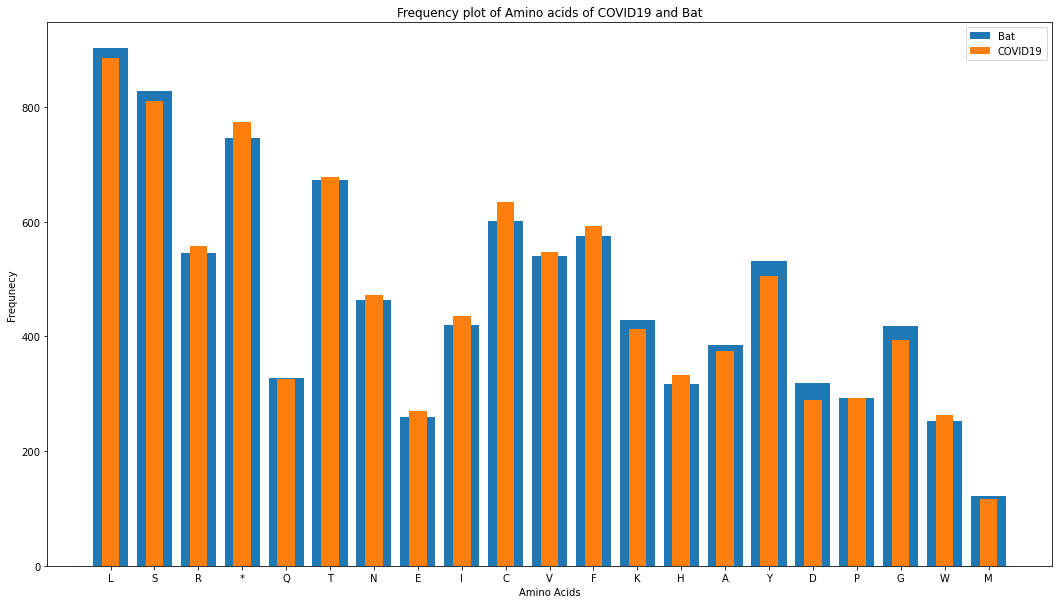

In [17]:
#plotting the comparative bar plots for both the viruses
plt.figure(figsize=(18,10))
plt.bar(bat_amino_acid_frequency.keys(), bat_amino_acid_frequency.values(),label="Bat")
plt.bar(covid_amino_acid_frequency.keys(), covid_amino_acid_frequency.values(), width = 0.5*0.8,label="COVID19")
plt.xlabel("Amino Acids")
plt.ylabel("Frequnecy")
plt.title("Frequency plot of Amino acids of COVID19 and Bat")
plt.legend()
plt.show()

In [18]:
#adapted from @JCharis
#defining function for plotting
def delta(x,y):
    return 0 if x==y else 1

def M(seq1, seq2, i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k], seq2[j:j+k]))

def makeMatrix(seq1, seq2, k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n -k+1)]

def plotMatrix(M, t, seq1, seq2, nonblank= chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label, row in zip(seq1, M):
        line = ''.join(nonblank if s<t else blank for s in row)
        print(label + '|' + line)

def dotplot(seq1, seq2, k=1, t=1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1, seq2)
    

# Convert to Fxn
def dotplotx(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()

In [19]:
dotplot(COVID_nucleotide_sequence[0:100],Bat_nucleotide_sequence[0:100])

 |CTTTCCAGGTAACAAACCAACGAACTCTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGACTGTCACTCGGCTGCATGCTTAGT
------------------------------------------------------------------------------------------------------
A|      ■   ■■ ■■■  ■■  ■■      ■        ■ ■          ■■■  ■■    ■■■■        ■     ■         ■     ■  
T| ■■■     ■               ■ ■   ■ ■ ■■ ■   ■ ■ ■■ ■ ■        ■■■    ■ ■ ■ ■   ■ ■   ■    ■   ■  ■■  ■
T| ■■■     ■               ■ ■   ■ ■ ■■ ■   ■ ■ ■■ ■ ■        ■■■    ■ ■ ■ ■   ■ ■   ■    ■   ■  ■■  ■
A|      ■   ■■ ■■■  ■■  ■■      ■        ■ ■          ■■■  ■■    ■■■■        ■     ■         ■     ■  
A|      ■   ■■ ■■■  ■■  ■■      ■        ■ ■          ■■■  ■■    ■■■■        ■     ■         ■     ■  
A|      ■   ■■ ■■■  ■■  ■■      ■        ■ ■          ■■■  ■■    ■■■■        ■     ■         ■     ■  
G|       ■■            ■       ■       ■  ■    ■          ■             ■ ■ ■   ■      ■■  ■   ■    ■ 
G|       ■■            ■       ■       ■  ■    ■          ■             ■

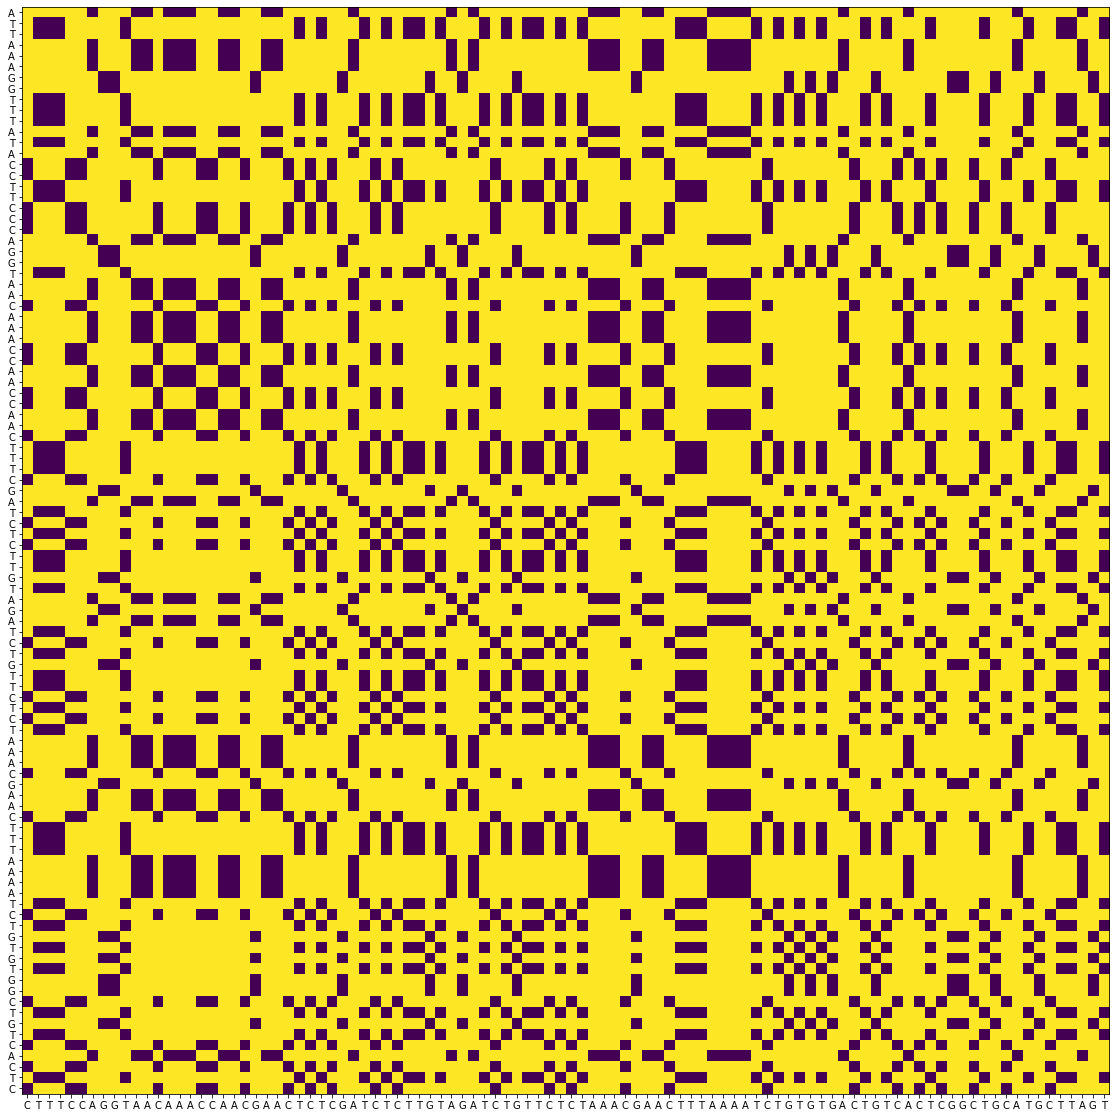

In [22]:
plt.figure(figsize=(20,20))
dotplotx(COVID_nucleotide_sequence[0:100],Bat_nucleotide_sequence[0:100])